In [1]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
#importing all neccesary packages
#setting the style and colour of the plot to be created
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


In [3]:
#accessing all datasets and storing them
dataset1= "desktop\Att18.xlsx"
dataset2="desktop\Att19.xlsx"
dataset3="desktop\Drop18.xlsx"
dataset4="desktop\Drop19.xlsx"
#reading the datasets using pandas and storing in different dataframes
df1= pd.read_excel(dataset1)
df2= pd.read_excel(dataset2)
df3= pd.read_excel(dataset3)
df4= pd.read_excel(dataset4)
#joining all dataframes into one
dataframe=[df1,df2,df3,df4]
df=pd.concat(dataframe, ignore_index=True, sort =False)


In [4]:
df.isnull().sum()

S.No.                       0
Expert Group                0
Section Code                0
Reference No.               0
Course Code                 0
Course Description          0
Course Type                 0
Program Type             9294
Start Date                  0
End Date                    0
No. of Days                 0
Agency                      0
Nomination Source       23107
Gender                      0
Age                         1
Designation              1166
Grade / Level             151
Category                    0
Cadre                   19425
Executive Head             25
Group                    4133
Department                 41
Section                  5830
Employee Location           0
Superior P.No.          78964
Superior Name           78964
Superior Designation    78991
Superior level          78964
Training Coordinator    18362
Program Director           11
BHR P.No.                9773
BHR Name                 9773
Status                      0
Call Count

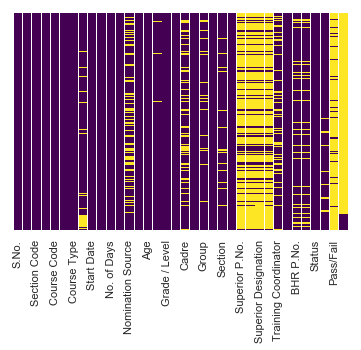

In [5]:
#showing the attributes that have missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

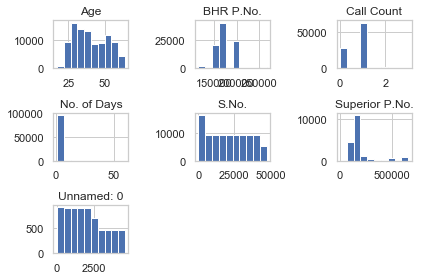

In [6]:
df.hist()
plt.tight_layout()
plt.show()


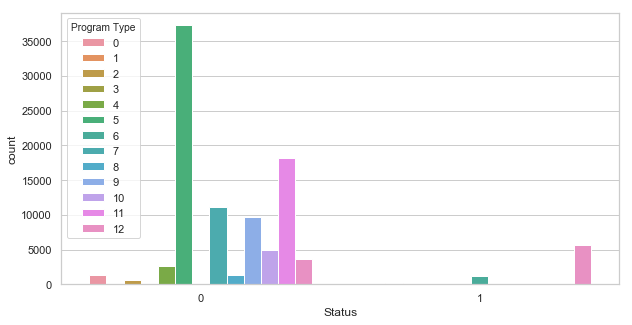

In [43]:
#count-plot of people who attended based on course type
plt.figure(figsize=(10,5)) # this creates a figure 8 inch wide, 4 inch high
sns.countplot(x='Status', hue='Program Type', data=df) 
plt.show()

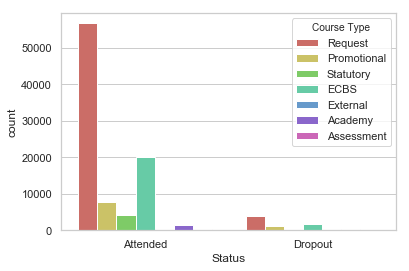

In [8]:
#count-plot of people who attended based on course type
sns.countplot(x='Status', hue='Course Type', data=df, palette='hls')


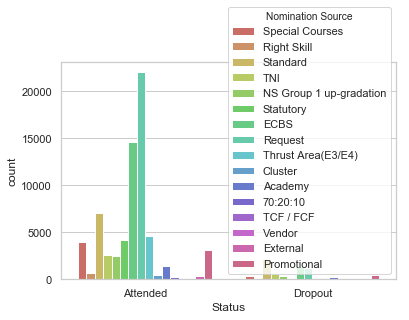

In [9]:
sns.countplot(x='Status', hue='Nomination Source', data=df, palette='hls')

In [10]:
to_drop= ['S.No.','Start Date','End Date','Superior Designation','Superior level', 'Training Coordinator','Cadre','Superior P.No.', 'Superior Name', 'BHR P.No.', 'BHR Name', 'Pass/Fail', 'Unnamed: 0', 'Call Count']
df.drop(to_drop, inplace=True, axis=1)

In [11]:
#df.drop(['Course Type', 'Program Type', 'Agency', 'Gender', 'Category'], inplace=True, axis=1)

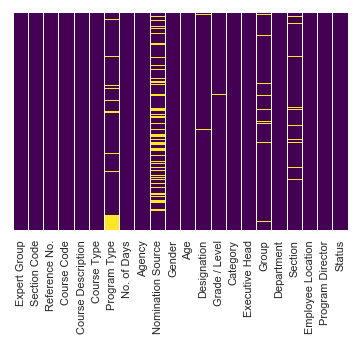

In [12]:
#showing the attributes that have missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [13]:
df.dtypes


Expert Group           object
Section Code           object
Reference No.          object
Course Code            object
Course Description     object
Course Type            object
Program Type           object
No. of Days             int64
Agency                 object
Nomination Source      object
Gender                 object
Age                   float64
Designation            object
Grade / Level          object
Category               object
Executive Head         object
Group                  object
Department             object
Section                object
Employee Location      object
Program Director       object
Status                 object
dtype: object

In [14]:
df.isnull().sum()

Expert Group              0
Section Code              0
Reference No.             0
Course Code               0
Course Description        0
Course Type               0
Program Type           9294
No. of Days               0
Agency                    0
Nomination Source     23107
Gender                    0
Age                       1
Designation            1166
Grade / Level           151
Category                  0
Executive Head           25
Group                  4133
Department               41
Section                5830
Employee Location         0
Program Director         11
Status                    0
dtype: int64

In [15]:
le = LabelEncoder()

In [16]:
df['Program Type'] = le.fit_transform(df['Program Type'].astype(str))
df['Designation'] = le.fit_transform(df['Designation'].astype(str))
df['Grade / Level'] = le.fit_transform(df['Grade / Level'].astype(str))
df['Executive Head'] = le.fit_transform(df['Executive Head'].astype(str))
df['Group'] = le.fit_transform(df['Group'].astype(str))
df['Department'] = le.fit_transform(df['Department'].astype(str))
df['Section'] = le.fit_transform(df['Section'].astype(str))
df['Program Director'] = le.fit_transform(df['Program Director'].astype(str))
df['Nomination Source'] = le.fit_transform(df['Nomination Source'].astype(str))

# Using Label Encoder to convert the categorical data to Numeric Data

In [17]:
# apply "le.fit_transform"
df_encoded = df.apply(le.fit_transform)
print(df_encoded)

       Expert Group  Section Code  Reference No.  Course Code  \
0                10            10           2712          568   
1                10            10           2712          568   
2                10            10           2712          568   
3                10            10           2712          568   
4                10            26           3826          862   
5                10            26           3826          862   
6                 6            15           2241          377   
7                 2             9           1751          294   
8                 1            24            179           78   
9                 1            24            179           78   
10                6            15           2349          396   
11                4            13           4384          987   
12                4            13           4384          987   
13                1            24           4224          969   
14                9      

In [18]:
df = df_encoded.reindex(np.random.permutation(df_encoded.index))
df.head

<bound method NDFrame.head of        Expert Group  Section Code  Reference No.  Course Code  \
37007             9            23           1191          193   
25322            10            10           2964          639   
68411             1            24            643          171   
36866            10            10           2914          618   
45469             1            24           3320          714   
69713            10            10           2860          605   
62933             7            17           2054          337   
72284             9            23           1393          193   
60915             2             9            509          126   
90582             1            24            384          106   
5283              9            23           1182          193   
19761             9            23            899          193   
52817            10            27           5056         1136   
86129             1            24            643          17

# Logistic Regression Model

In [19]:
x = df.drop('Status', axis=1)
y = df['Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

The classification report displays the Precision, Recall , F1  and Support scores for the model.

In [21]:
#Precision score means the the level up-to which the prediction made by the model is precise.
#Recall is the amount up-to which the model can predict the outcome.
#F1 and Support scores are the amount of data tested for the predictions.
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     30030
           1       0.30      0.03      0.06      2314

   micro avg       0.93      0.93      0.93     32344
   macro avg       0.62      0.51      0.51     32344
weighted avg       0.89      0.93      0.90     32344

[[29868   162]
 [ 2243    71]]
0.9256430868167203
Accuracy: 0.9256430868167203
Precision: 0.30472103004291845
Recall: 0.030682800345721694


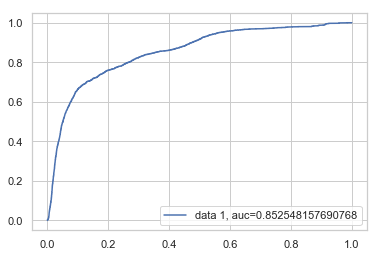

In [22]:
y_pred_proba = logmodel.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [23]:
rfe = RFE(logmodel, n_features_to_select= None)
rfe = rfe.fit(x, y)
print(rfe.support_)
print(rfe.ranking_)
f = rfe.get_support(1) #the most important features
X = df[df.columns[f]] # final features

[ True False False False False  True  True  True  True  True  True False
 False False  True  True False False False  True False]
[ 1  7 12  3  5  1  1  1  1  1  1  2  9 10  1  1  4  6  8  1 11]


In [24]:
temp = pd.Series(rfe.support_,index = x.columns)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Expert Group', 'Course Type', 'Program Type', 'No. of Days', 'Agency',
       'Nomination Source', 'Gender', 'Category', 'Executive Head',
       'Employee Location'],
      dtype='object')


In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [26]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [27]:
auc = roc_auc_score(y_test, predictions)
print('AUC: %.2f' % auc)

AUC: 0.51


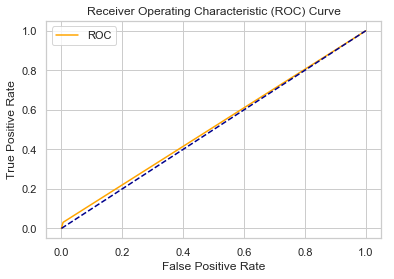

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plot_roc_curve(fpr, tpr)

# Decision Tree Model

In [29]:
from sklearn import tree
model= tree.DecisionTreeClassifier()

In [30]:
#Defining Features and lables
features= list(df.columns)
features.remove('Status')

In [31]:
X = df.drop('Status', axis=1)
Y = df['Status']
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)

In [32]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
model.score(X_test, y_test)

0.9957149415905728

In [34]:
predictions_2 = model.predict(X_test)
print(classification_report(y_test, predictions_2))
print(confusion_matrix(y_test, predictions_2))
print(accuracy_score(y_test, predictions_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18203
           1       0.97      0.97      0.97      1400

   micro avg       1.00      1.00      1.00     19603
   macro avg       0.98      0.98      0.98     19603
weighted avg       1.00      1.00      1.00     19603

[[18159    44]
 [   40  1360]]
0.9957149415905728


In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions_2))
print("Precision:",metrics.precision_score(y_test, predictions_2))
print("Recall:",metrics.recall_score(y_test, predictions_2))

Accuracy: 0.9957149415905728
Precision: 0.9686609686609686
Recall: 0.9714285714285714


In [36]:
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus

In [37]:
dot_data = StringIO()
tree.export_graphviz(model,
                     out_file = dot_data,
                     feature_names = features,
                     filled=True, rounded=True,
                     impurity=False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [38]:
# Create PDF
graph.write_pdf("TATA_Data.pdf")

# Create PNG
graph.write_png("TATA_Data.png")

True

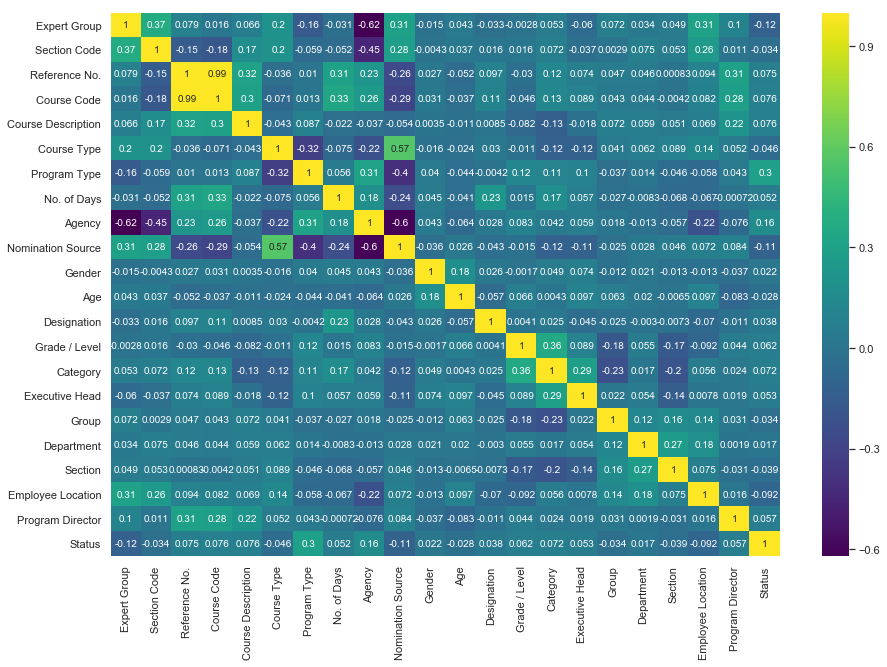

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(data= df.corr(), annot=True, cmap='viridis')

In [45]:
auc = roc_auc_score(y_test, predictions_2)
print('AUC: %.2f' % auc)

AUC: 0.98


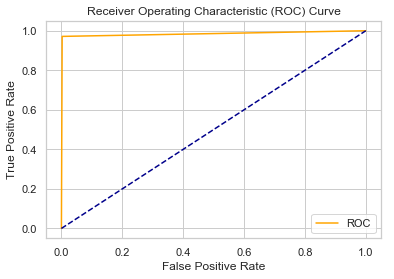

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, predictions_2)
plot_roc_curve(fpr, tpr)